In [3]:
import numpy as np
import matplotlib.pyplot as plt


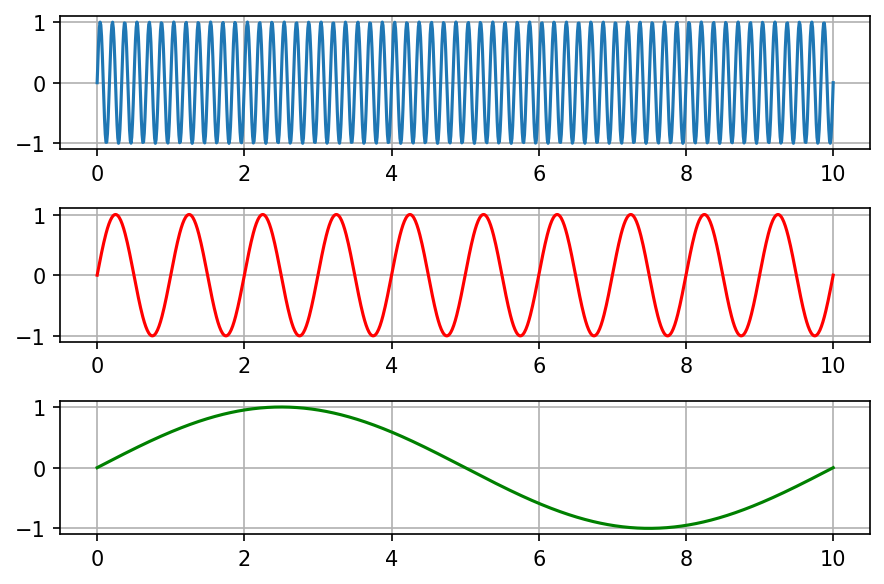

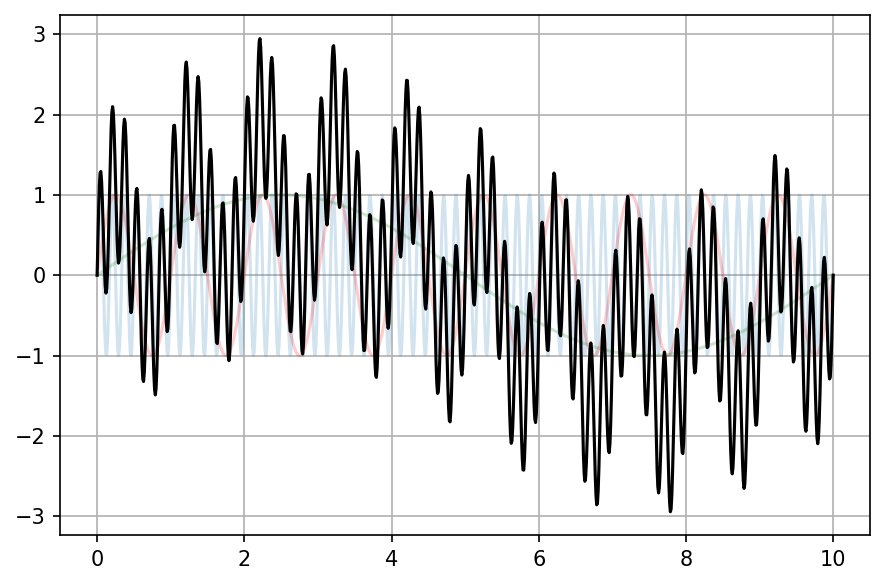

In [33]:
t = np.linspace(0,10,1000)

f1 = 6
f1 = np.sin(2*np.pi*f1*t)

f2 = 1
f2 = np.sin(2*np.pi*f2*t)

f3 = 0.1
f3 = np.sin(2*np.pi*f3*t)

total = f1+f2+f3

fig, ax = plt.subplots(3,1,dpi=150)
ax[0].plot(t,f1)
ax[1].plot(t,f2,color='red')
ax[2].plot(t,f3,color='green')

for ax in ax.ravel():
    ax.grid()

fig.tight_layout()



fig, ax = plt.subplots(dpi=150)
ax.plot(t,f1,alpha=0.2)
ax.plot(t,f2,color='red',alpha=0.2)
ax.plot(t,f3,color='green',alpha=0.2)
ax.plot(t,total,color='black')

ax.grid()

fig.tight_layout()

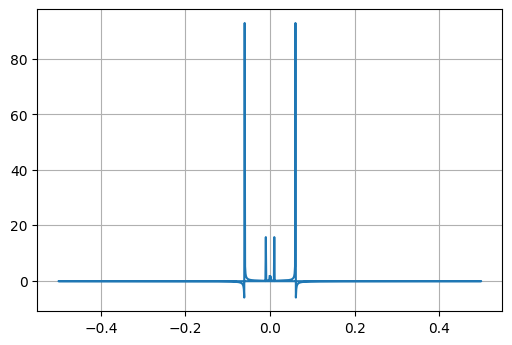

In [44]:
FT = np.fft.fft(total)
frequencies = np.fft.fftfreq(1000)

fig, ax = plt.subplots(dpi=100)
ax.plot(frequencies,FT)
ax.grid()

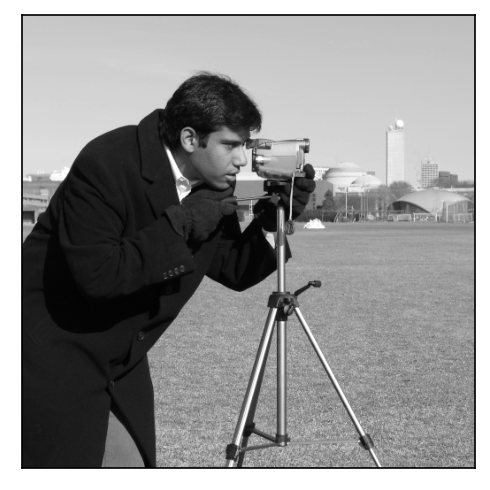

In [37]:
from skimage import data

caller = getattr(data, 'camera')
image = caller()

plt.figure(dpi=150)
plt.imshow(image, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

([], [])

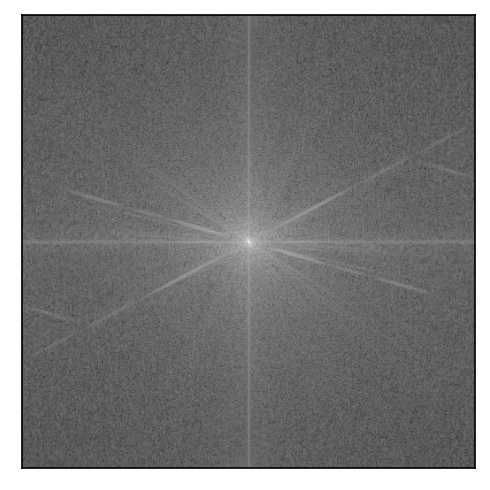

In [48]:
FT = np.fft.fftshift(np.fft.fft2(image))

from matplotlib.colors import LogNorm

plt.figure(dpi=150)
plt.imshow(np.abs(FT), norm=LogNorm(), cmap='gray')
plt.xticks([])
plt.yticks([])

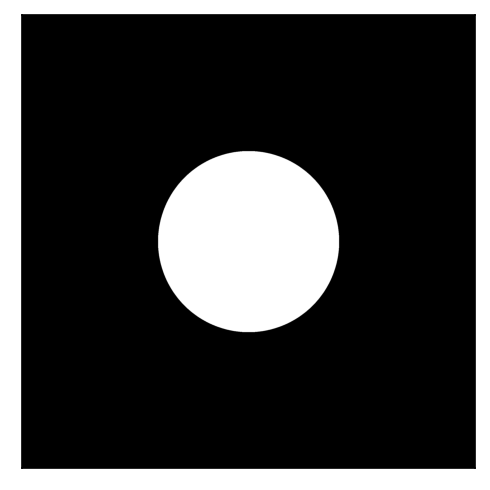

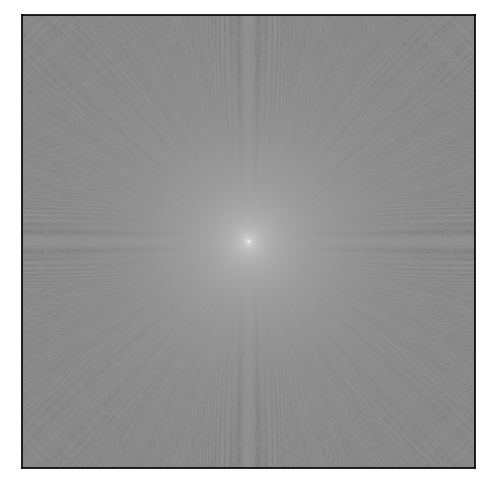

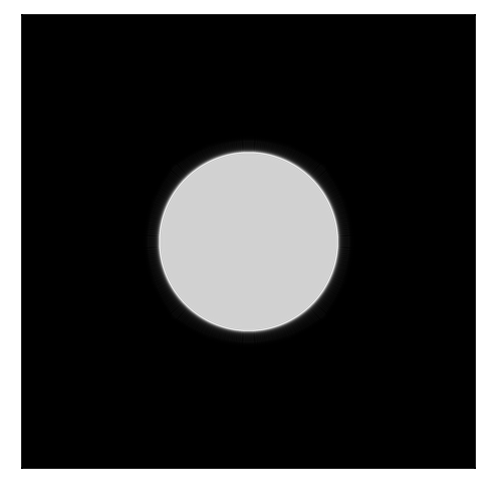

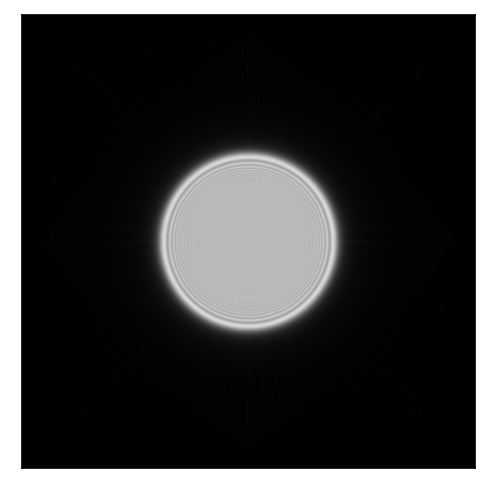

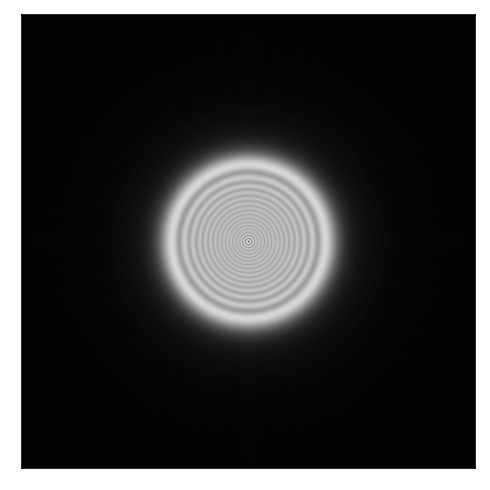

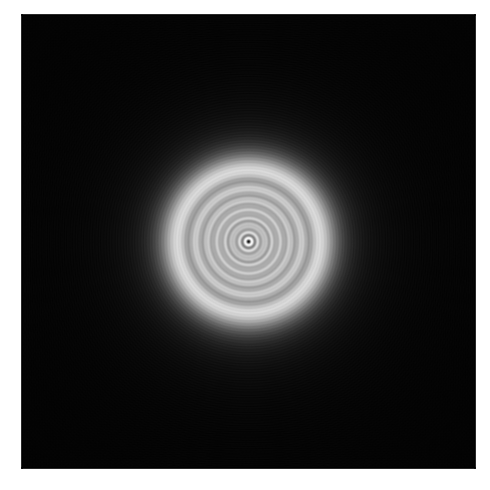

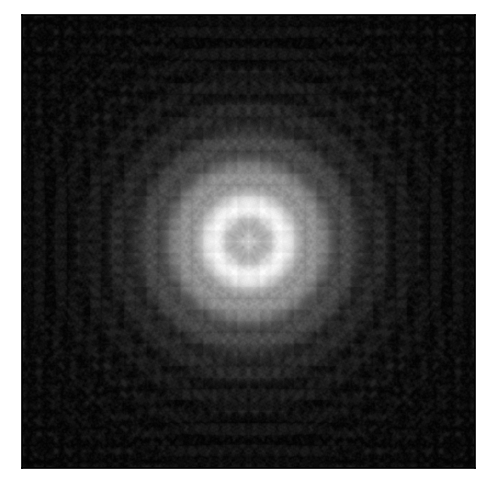

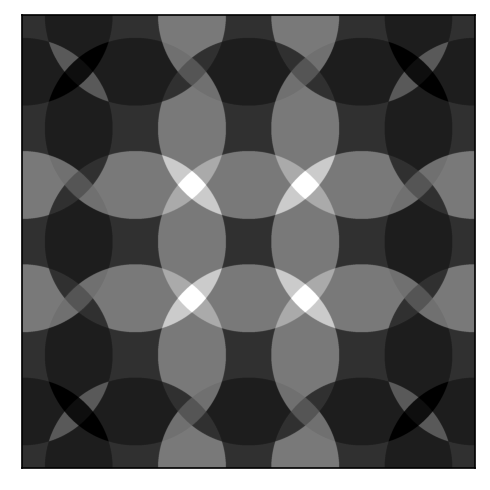

In [78]:
def propagate_beam(wavefront, experiment_params,propagator='fourier'):
    """ Propagate a wavefront using fresnel ou fourier propagator

    Args:
        wavefront : the wavefront to propagate
        dx : pixel spacing of the wavefront input
        wavelength : wavelength of the illumination
        distance : distance to propagate
        propagator (str, optional): 'fresenel' or 'fourier'. Defaults to 'fresnel'.

    Returns:
        output: propagated wavefront
    """    

    dx, wavelength,distance = experiment_params 
    
    if propagator == 'fourier':
        if distance > 0:
            output = fftshift(fft2(fftshift(wavefront)))
        else:
            output = ifftshift(ifft2(ifftshift(wavefront)))            
    
    elif propagator == 'fresnel':
    
        ysize, xsize = wavefront.shape
        x_array = np.linspace(-xsize/2,xsize/2-1,xsize)
        y_array = np.linspace(-ysize/2,ysize/2-1,ysize)

        fx = x_array/(xsize)
        fy = y_array/(ysize)

        FX,FY = np.meshgrid(fx,fy)
        # Calculate approx phase distribution for each plane wave component
        w = FX**2 + FY**2 
        # Compute FFT
        F = fftshift(fft2(fftshift(wavefront)))
        # multiply by phase-shift and inverse transform 
        a = np.exp(-1j*np.pi*( distance*wavelength/dx**2)*w)
        output = ifftshift(ifft2(ifftshift(F*a)))

    return output

from numpy.fft import fft2, fftshift, ifftshift, ifft2

x = np.arange(-1000,1000,1)
Y, X = np.meshgrid(x,x)

R = 400

mask = np.where(X**2 + Y**2 < R**2,1,0)

plt.figure(dpi=150)
plt.imshow(mask,cmap='gray')
plt.xticks([])
plt.yticks([])

prop = propagate_beam(mask, (1,1,1), propagator='fourier')

plt.figure(dpi=150)
plt.imshow(np.abs(prop),cmap='gray',norm=LogNorm())
plt.xticks([])
plt.yticks([])

for i in [10,100,500,1000,10000,100000]:
    experiment_params = (1,10,i) #  dx, wavelength,distance

    prop = propagate_beam(mask, experiment_params, propagator='fresnel')

    plt.figure(dpi=150)
    plt.imshow(np.abs(prop),cmap='gray')
    plt.xticks([])
    plt.yticks([])             
    plt.show()
    plt.close()